In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 

In [27]:
audiofi = './audio/nommoslice.wav'
y, sr = librosa.load(audiofi)
dur = len(y)/sr
print 'duration of %r is %r seconds'%(audiofi, dur)
tempo,beats = librosa.beat.beat_track(y=y,sr=sr) 
hop_length= 512

duration of './audio/nommoslice.wav' is 20 seconds


In [15]:
print tempo
print beats

67.9995888158
[  6  41  79 117 155 192 233 271 310 349 398 441 484 521 557 592 631 666
 702 739 775 813 852]


In [16]:
beats_in_samp = beats*hop_length
print beats_in_samp

[  3072  20992  40448  59904  79360  98304 119296 138752 158720 178688
 203776 225792 247808 266752 285184 303104 323072 340992 359424 378368
 396800 416256 436224]


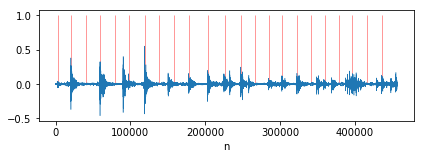

In [17]:
plt.figure() 
plt.subplot(2,1,1) 
plt.plot(y, linewidth='0.5') 
plt.vlines(beats_in_samp, 0, 1, color='r', alpha=0.8, linewidth='0.5')
plt.xlabel('n') 
plt.ylabel('') 

plt.axis('tight') 
plt.tight_layout() 


plt.show() 
plt.close()

In [22]:
def overlaybeats(samplepath, framepattern, sourcepath, scaledamp=False):
    #print framepattern
    [ysamp, sr] = librosa.load(samplepath, offset=0,sr=44100)
    [ysource, srsource] = librosa.load(sourcepath, offset=0, duration=dur,sr=44100) 
    print "sr:%r, srsource:%r"%(sr,srsource)
    
    if srsource != sr:
        print 'sample rates of source and sample are not the same!'
    
    sampsz = len(ysamp)
    print 'length of ysamp:', sampsz
    sourcesz = len(ysource)
    
    window = np.array(ysource)
    window = np.concatenate((window,np.zeros(sampsz)))
    print 'window length,', len(window)
    
    print 'here'
    for i,samp in enumerate(framepattern):
        #print frame
        print samp, samp + sampsz
        #print onset_amps[frame]
        #print window[frame:(frame+sampsz)]
        
        # scaled amps
        #window[samp:(samp+sampsz)] = window[samp:(samp+sampsz)] + onset_amps[i]*ysamp
        
        window[samp:(samp+sampsz)] = window[samp:(samp+sampsz)] + ysamp


        
        #print (window[frame:(frame+sampsz)] + ysamp)
      
    return window

In [23]:
overlayedbeats = overlaybeats('./samples/woodblock_mono.wav', beats_in_samp,'./audio/nommoslice.wav')

sr:44100, srsource:44100
length of ysamp: 19097
window length, 901097
here
3072 22169
20992 40089
40448 59545
59904 79001
79360 98457
98304 117401
119296 138393
138752 157849
158720 177817
178688 197785
203776 222873
225792 244889
247808 266905
266752 285849
285184 304281
303104 322201
323072 342169
340992 360089
359424 378521
378368 397465
396800 415897
416256 435353
436224 455321


In [25]:
librosa.output.write_wav('./beataudio/nommoslice_beattrack.wav', overlayedbeats, sr=sr)

In [28]:
!open -a Audacity ./beataudio/nommoslice_beattrack.wav 